# **Task 1**

In [1]:
import cv2

image = cv2.imread('/content/sample_data/Picture1.jpg')


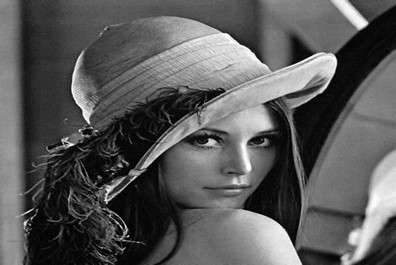

In [2]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
height, width, channels = image.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")


Height: 265, Width: 396, Channels: 3


In [4]:
total_pixels = height * width * channels
print(f"Total Pixels: {total_pixels}")


Total Pixels: 314820


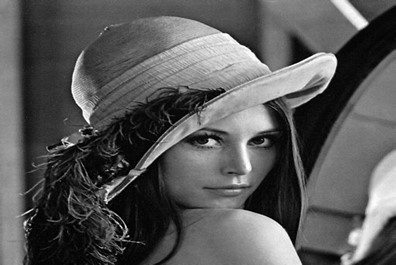

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)


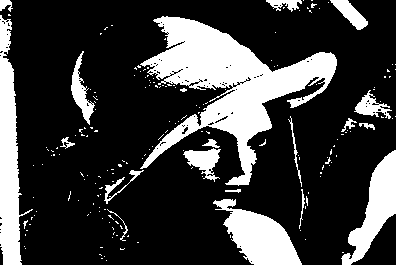

In [6]:
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)


In [8]:
black_pixels = cv2.countNonZero(255 - binary_image)
print(f"Black Pixels: {black_pixels}")

Black Pixels: 79883


# **Task 2**

# **Edge Detection**

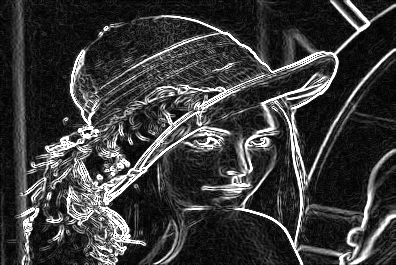

In [9]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)
cv2_imshow(sobel_edges)


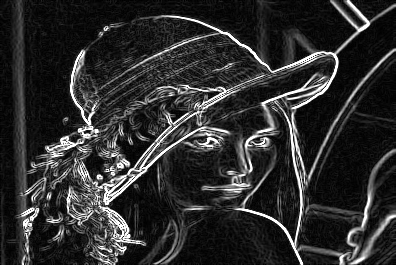

In [13]:
import numpy as np

prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

prewitt_x = cv2.filter2D(image, cv2.CV_64F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(image, cv2.CV_64F, prewitt_kernel_y)

prewitt_edges = cv2.magnitude(prewitt_x, prewitt_y)

cv2_imshow(prewitt_edges)


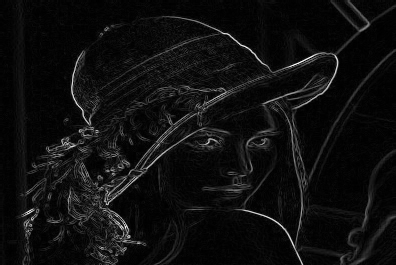

In [15]:
roberts_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

roberts_x = cv2.filter2D(image, cv2.CV_64F, roberts_kernel_x)
roberts_y = cv2.filter2D(image, cv2.CV_64F, roberts_kernel_y)

roberts_edges = cv2.magnitude(roberts_x, roberts_y)
cv2_imshow(roberts_edges)

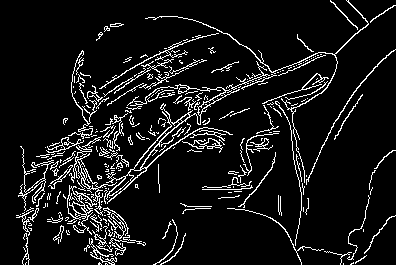

In [16]:
canny_edges = cv2.Canny(image, 100, 200)
cv2_imshow(canny_edges)


# **Image Segmentation**

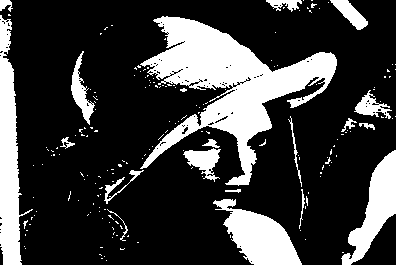

In [17]:
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(global_thresh)


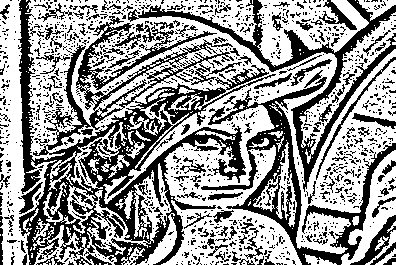

In [18]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(adaptive_thresh)


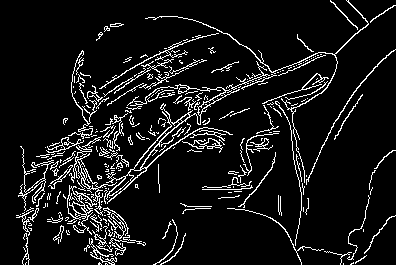

In [19]:
cv2_imshow(canny_edges)


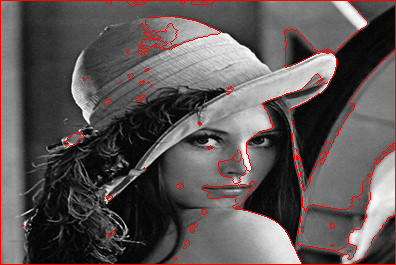

In [23]:
import cv2
import numpy as np

_, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

markers = cv2.connectedComponents(thresh)[1]
markers = markers + 1

markers[thresh == 0] = 0

cv2.watershed(image, markers)

image[markers == -1] = [0, 0, 255]

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
